# Executive Summary

I used Customer dataset which was downloaded from Kaggle. This dataset has 200 entries, 5 columns which is named "CustomerID", "Gender", "Age", "Annual Income", "Spending Score". There is no any missing value. I tried to determine the customer segmentation on this dataset. 

I used K-Means and K-Prototypes clustering algorithms to reach this aim. K-Means can be used just with numeric value, however K-Prototype algorithm can be used with numeric and categorical data. So, I applied to two different algorithms on this data.

As a result, I cannot reach any detail segmentation with K-Means. I just say that there are 5 group which have different qualities about the spending score and annual income.

Group 1 is that they have low income and low spending score.

Group 2 is that they low income and high spending score.

Group 3 is medium income and medium spending score.

Group 4 is high income but low spending score.

Group 5 is high income and high annual income too.

However, we don't have any idea about the customer's age and gender so, this situation prevents us to identify our customers. To solve this problem I use K-Prototype algortihm.

As a result of the K-Prototype algorithm analysis, I found 5 clusters again. But this time I have more information about the clusters characteristics. Here is qualities of the clusters:

Cluster 0 is age between 36-50, Female, Annual Income high, Spending Score low

Cluster 1 is age between 36-50, Male, Annual Income high, Spending Score low

Cluster 2 is age between 17-35, Female, Annual Income high, Spending Score high

Cluster 3 is age between 17-35, Male, Annual Income high, Spending Score high

Cluster 4 is age between 51-70, Male, Annual Income low, Spending Score low

Based on these insights we can map out a marketing strategy to target each cluster and increase the profits.

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

## Import the Dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    object  
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
 4   cluster                 200 non-null    int32   
 5   age_bins                200 non-null    category
dtypes: category(1), int32(1), int64(3), object(1)
memory usage: 7.5+ KB


## Check the missing values before analysis

In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Customer index do not use in the cluster analysis. Because it does not give any information about the analysis.

In [4]:
data.drop(columns = 'CustomerID', inplace=True)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Converting Age to bins

In [92]:
print("Min Age: ", data['Age'].min())
print("Max Age: ", data['Age'].max())

Min Age:  18
Max Age:  70


In [93]:
data['age_bins'] = pd.cut(data.Age, bins=(17, 35, 50, 70), labels= ['17-35', '36-50', '51-70'] )

In [94]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,age_bins
0,Male,19,15,39,4,17-35
1,Male,21,15,81,3,17-35
2,Female,20,16,6,4,17-35
3,Female,23,16,77,3,17-35
4,Female,31,17,40,4,17-35


## Determine the numeric columns and string columns

In [61]:
num_cols=data.select_dtypes(include=['int64']).columns
ctg_cols=data.select_dtypes(include=['object']).columns

print('Numerical Cols=',num_cols)
print('Categorical Cols=',ctg_cols)

Numerical Cols= Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Categorical Cols= Index(['Gender'], dtype='object')


## Exploratory Data Analysis

I used distribution and boxplot for numeric variables. 

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seab

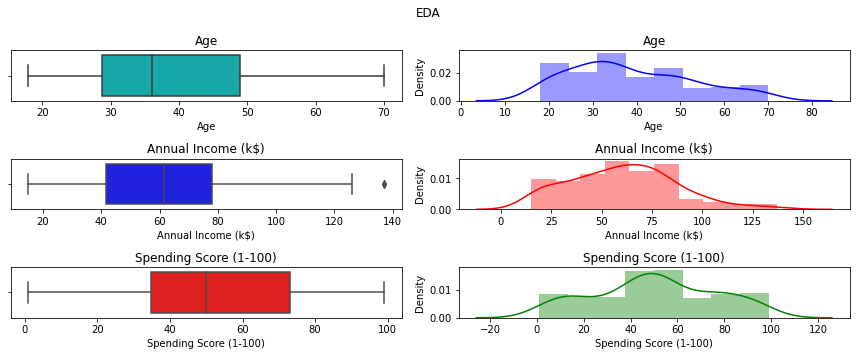

In [62]:
cols_val=2
fig, ax = plt.subplots(len(num_cols),cols_val,figsize=(12, 5))
colours_val=['c','b','r','g','y','p','m']
did_not_ran=True
for i,col in enumerate(num_cols):
    for j in range(cols_val):
        if did_not_ran==True:
            sns.boxplot(data[col],ax=ax[i,j],color=colours_val[i+j])
            ax[i,j].set_title(col)
            did_not_ran=False
        else:
            sns.distplot(data[col],ax=ax[i,j],color=colours_val[i+j])
            ax[i,j].set_title(col)
            did_not_ran=True
            
            
plt.suptitle("EDA")
plt.tight_layout()
plt.show()

## Distribution of the Annual Income & Spending Score

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


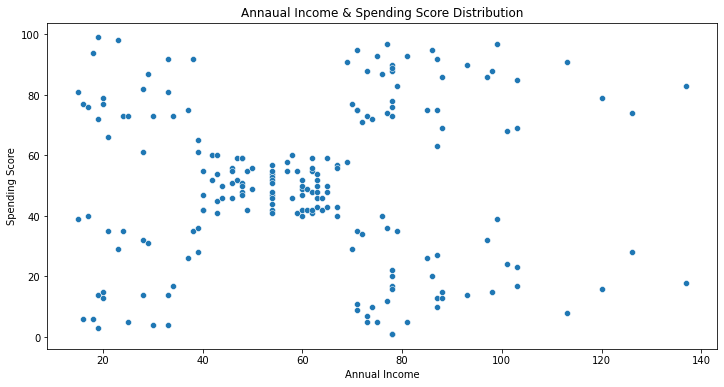

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(data['Annual Income (k$)'] ,data['Spending Score (1-100)'])
plt.title('Annaual Income & Spending Score Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [77]:
df1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Use Min-Max Normalization for analysis

In [78]:
std = MinMaxScaler()
arr1 = std.fit_transform(df1)

## Use just nmeric variables for analysis. Because K-Means can work with just numeric values.

In [79]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Determine the clusters count

I use WCSS scores for determining the clusters count.

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

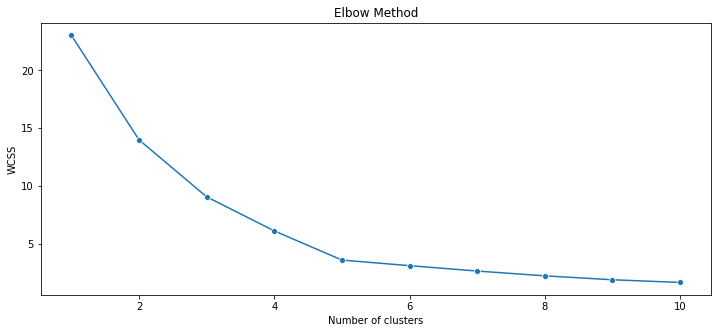

In [80]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(arr1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,5))
sns.lineplot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Interpretation of the WCSS Scores

When I analyze the graphic, I see that it is suitable to determine 5 clusters. Because it can be seen there after fifth cluster there is a breaking. So I redo my analysis according to the 5 clusters.

In [86]:
kmeans_cluster=KMeans(n_clusters=5,random_state=0)
result_cluster=kmeans_cluster.fit_predict(arr1)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
data['cluster'] = result_cluster

In [88]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


## Clusters and Counts

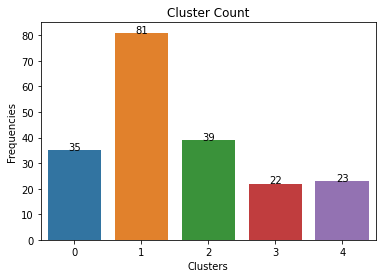

In [89]:
ax =sns.countplot(x=data.cluster)
for index, row in pd.DataFrame(data['cluster'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
plt.xlabel('Clusters')
plt.ylabel('Frequencies')
plt.title('Cluster Count');

## Clusters according to the Spending Score and Annual Income

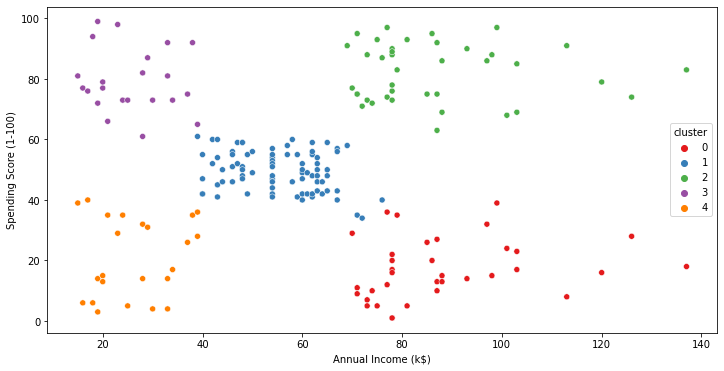

In [90]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Annual Income (k$)'], y =data['Spending Score (1-100)'], 
                hue = data['cluster'], palette='Set1'
               );

## Interpretation of the Clusters:

There are 5 group which have different qualities about the spending score and annual income.

Group 1 is that they have low income and low spending score.

Group 2 is that they low income and high spending score.

Group 3 is medium income and medium spending score.

Group 4 is high income but low spending score.

Group 5 is high income and high annual income too.

However, we don't have any idea about the customer's age and gender so, this situation prevents us to identify our customers. To solve this problem I use K-Prototype algortihm. You can see the process below.

# K-Prototype

In [99]:
df_proto = pd.DataFrame(arr1, columns = ['Annual Income', 'Spending Score'])
df_proto.head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [109]:
df_cat = data[['Gender', 'age_bins']]

In [110]:
df2 = pd.concat([df_proto, df_cat], axis = 1)

In [111]:
df2.head()

,Annual Income,Spending Score,Gender,age_bins
0,0.000000,0.387755,Male,17-35
1,0.000000,0.816327,Male,17-35
2,0.008197,0.051020,Female,17-35
3,0.008197,0.775510,Female,17-35
4,0.016393,0.397959,Female,17-35


In [116]:
kproto_cluster = KPrototypes(n_clusters=5, random_state=42, init = 'Huang')
result_cluster = kproto_cluster.fit_predict(df2, categorical = [2,3])

In [117]:
df2['clusters'] = result_cluster
df2['clusters'].value_counts()

2    59
0    46
3    38
4    29
1    28
Name: clusters, dtype: int64

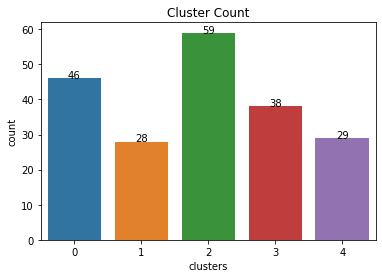

In [119]:
ax = sns.countplot(x = df2['clusters'])
for index, row in pd.DataFrame(df2['clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [120]:
kproto_cluster.cluster_centroids_

array([['0.400392017106201', '0.32431233362910383', '3.0', 'Female',
        '36-50'],
       ['0.4856557377049179', '0.2288629737609333', '1.0', 'Male',
        '36-50'],
       ['0.3527368713531537', '0.681598062953995', '0.0', 'Female',
        '17-35'],
       ['0.39710957722174284', '0.7344253490870032', '2.0', 'Male',
        '17-35'],
       ['0.2334652345958169', '0.37790288529204785', '4.0', 'Male',
        '51-70']], dtype='<U32')

In [123]:
df3 = pd.concat([df1,df2], axis=1)

In [124]:
df3.head()

,Annual Income (k$),Spending Score (1-100),Annual Income,Spending Score,Gender,age_bins,clusters
0,15,39,0.000000,0.387755,Male,17-35,4
1,15,81,0.000000,0.816327,Male,17-35,3
2,16,6,0.008197,0.051020,Female,17-35,0
3,16,77,0.008197,0.775510,Female,17-35,2
4,17,40,0.016393,0.397959,Female,17-35,2


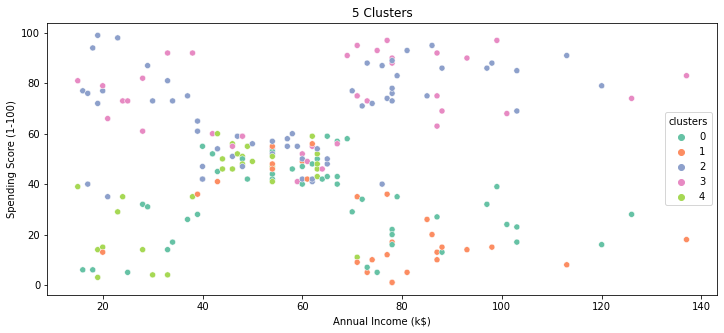

In [126]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df3['Annual Income (k$)'],y=df3['Spending Score (1-100)'],hue=df3.clusters,palette="Set2",)
plt.title('5 Clusters')
plt.show()

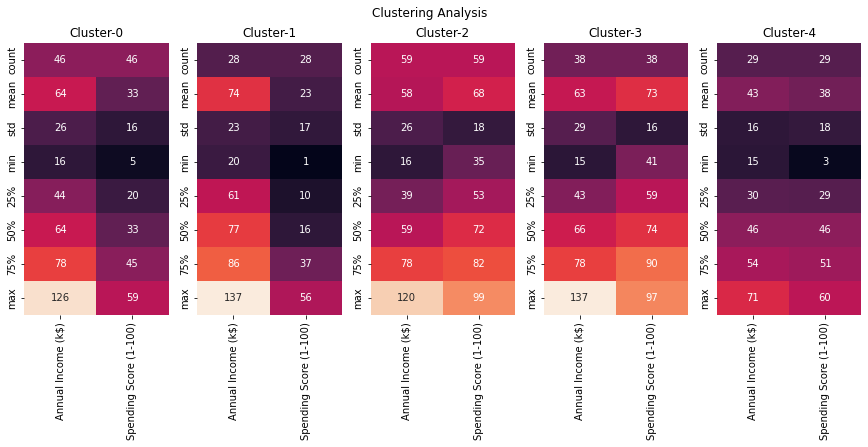

In [148]:
fig,ax=plt.subplots(1,5,figsize=(15,5))
#cbar_ax = fig.add_axes([1.03, .3, .03, .4])
for cluster_val in sorted(df3.clusters.unique()):
    #print(cluster_val)
    sns.heatmap(df3.loc[df3.clusters==cluster_val,['Annual Income (k$)', 'Spending Score (1-100)']].describe().round(), annot=True, fmt='g', ax=ax[cluster_val],
               cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)
    ax[cluster_val].set_title(titl)
    

plt.suptitle('Clustering Analysis')

plt.show()

## Age Wise Analysis

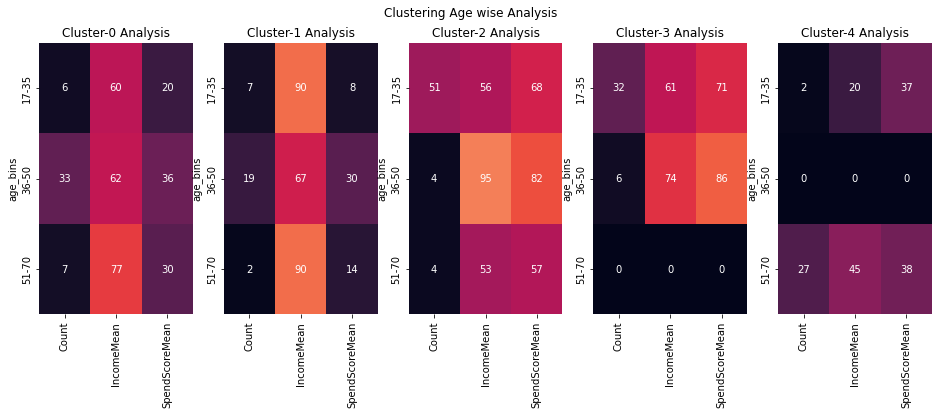

In [151]:
fig,ax=plt.subplots(1,5,figsize=(16,5))

for cluster_val in sorted(df3.clusters.unique()):
   
    sns.heatmap(df3.loc[df3.clusters==cluster_val,:].groupby('age_bins').agg({'clusters':'size','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).\
    rename(columns={'clusters':'Count','Annual Income (k$)':'IncomeMean','Spending Score (1-100)':'SpendScoreMean'})\
                .fillna(0).round(),annot=True,fmt='g',ax=ax[cluster_val],cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)+' Analysis'
    ax[cluster_val].set_title(titl)
    

plt.suptitle('Clustering Age wise Analysis')

plt.show()

## Gender Wise Analysis

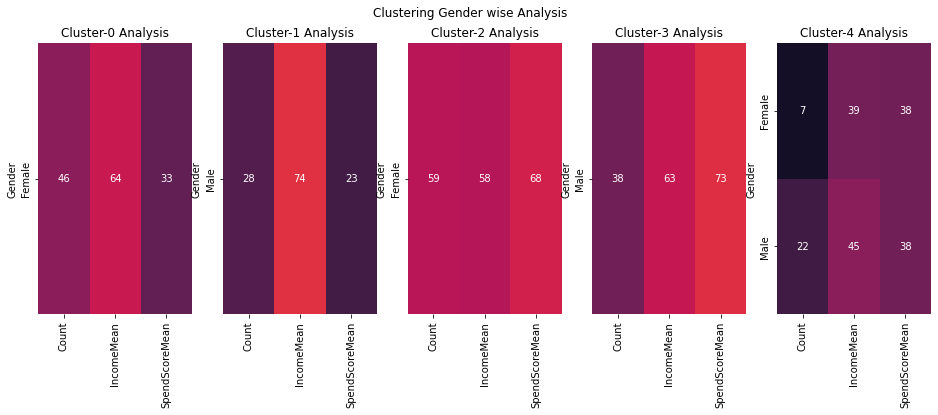

In [152]:
fig,ax=plt.subplots(1,5,figsize=(16,5))

for cluster_val in sorted(df3.clusters.unique()):
   
    sns.heatmap(df3.loc[df3.clusters==cluster_val,:].groupby('Gender').agg({'clusters':'size','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).\
    rename(columns={'clusters':'Count','Annual Income (k$)':'IncomeMean','Spending Score (1-100)':'SpendScoreMean'})\
                .fillna(0).round(),annot=True,fmt='g',ax=ax[cluster_val],cbar=i == 0,vmin=0, vmax=130)
    titl='Cluster-'+str(cluster_val)+' Analysis'
    ax[cluster_val].set_title(titl)
    

plt.suptitle('Clustering Gender wise Analysis')

plt.show()

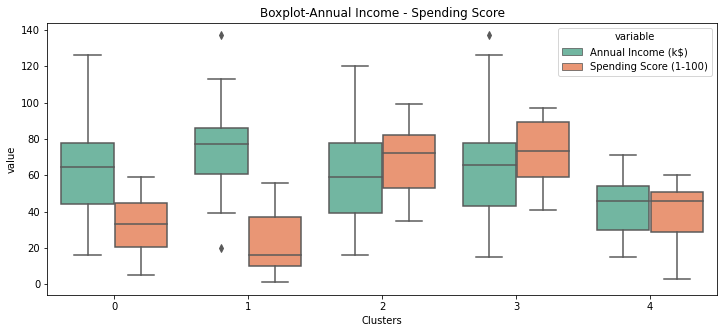

In [153]:
plt.figure(figsize=(12,5))

sns.boxplot(x='clusters',y='value',hue='variable',\
            data=pd.melt(df3,id_vars=['clusters'],value_vars=['Annual Income (k$)','Spending Score (1-100)']),\
           palette="Set2")
plt.xlabel("Clusters")
plt.title("Boxplot-Annual Income - Spending Score")
plt.show()

## Interpretation of the Clusters

Cluster 0 is age between 36-50, Female, Annual Income high, Spending Score low

Cluster 1 is age between 36-50, Male, Annual Income high, Spending Score low

Cluster 2 is age between 17-35, Female, Annual Income high, Spending Score high

Cluster 3 is age between 17-35, Male, Annual Income high, Spending Score high

Cluster 4 is age between 51-70, Male, Annual Income low, Spending Score low

Based on these insights we can map out a marketing strategy to target each cluster and increase the profits.